Strategy to find percolation


In [31]:
# Find the set of distinct species in a given grid

def count_different_species(grid : list[list[float]]) -> set:
    """
    Counts the number of different species present in a grid.
    
    Parameters:
    - grid (list[list[int]]): A 2D grid containing species represented by numbers.

    Returns:
    - unique_species (set): A set containing the unique species found in the grid.

    Example:
    grid = [[1, 2, 3], [2, 3, 4], [3, 4, 5]]
    count_different_species(grid)
    {1, 2, 3, 4, 5}
    """
    
    unique_species = set()

    for row in grid:
        for species in row:
            unique_species.add(species)

    return unique_species 

In [5]:
# Check the position of each unique species
def check_element_positions(grid, unique_number):

    # Create a matrix to represent the existence of unique numbers
    matrix = [[False] * len(row) for row in grid]

    # Check the position of each unique number
    for i in range(len(grid)):
        for j in range(len(grid[i])):
            if grid[i][j] == unique_number:
                matrix[i][j] = True

    return matrix

In [6]:
#Check if the matrix of the species is connected from top to bottom
def is_connected_top_to_bottom(matrix):
    
    rows = len(matrix)
    cols = len(matrix[0])

    visited = [[False] * cols for _ in range(rows)]

    def dfs(row, col):
        if row < 0 or row >= rows or col < 0 or col >= cols:
            return False

        if not visited[row][col] and matrix[row][col]:
            visited[row][col] = True

            if row == rows - 1:  # Reached the bottom row
                return True

            return (
                dfs(row - 1, col) or  # Check top neighbor
                dfs(row + 1, col) or  # Check bottom neighbor
                dfs(row, col - 1) or  # Check left neighbor
                dfs(row, col + 1) or  # Check right neighbor
                dfs(row - 1, col - 1) or  # Diagonal neighbors
                dfs(row - 1, col + 1) or
                dfs(row + 1, col - 1) or
                dfs(row + 1, col + 1))

        return False

    # Iterate over the top row and initiate DFS for each True value
    for col in range(cols):
        if matrix[0][col] and dfs(0, col):
            return True

    return False


In [7]:
#Check if the matrix of the species is connected from left to rigth
def is_connected_left_to_right(matrix):

    rows = len(matrix)
    cols = len(matrix[0])

    visited = [[False] * cols for _ in range(rows)]

    def dfs(row, col):
        if row < 0 or row >= rows or col < 0 or col >= cols:
            return False

        if not visited[row][col] and matrix[row][col]:
            visited[row][col] = True

            if col == cols - 1:  # Reached the rightmost column
                return True

            return (
                dfs(row - 1, col) or  # Check top neighbor
                dfs(row + 1, col) or  # Check bottom neighbor
                dfs(row, col + 1) or  # Check right neighbor
                dfs(row, col - 1) or  # Check left neighbor
                dfs(row - 1, col - 1) or  # Diagonal neighbors
                dfs(row - 1, col + 1) or
                dfs(row + 1, col - 1) or
                dfs(row + 1, col + 1))

        return False

    # Iterate over the leftmost column and initiate DFS for each True value
    for row in range(rows):
        if matrix[row][0] and dfs(row, 0):
            return True

    return False

In [28]:
def has_percolation(grid: list[int]):
      
    species_dict={}
    
    unique_species = count_different_species(grid)
    
    for species in unique_species:
        matrix = check_element_positions(grid, species)
        species_dict[species] = is_connected_left_to_right(matrix) or is_connected_top_to_bottom(matrix)

    return species_dict    

## Example

In [32]:
grid = [
    [1, 1, 1, 2, 2, 1, 1, 0, 2, 3, 2, 2, 0, 1, 1, 0, 2, 3, 1, 2, 0, 2, 3, 1, 0, 3, 1, 0, 3, 2, 1, 0, 1, 0, 2, 3, 1, 0, 1, 3, 2, 3, 0, 2, 1, 3],
    [1, 2, 2, 1, 0, 0, 2, 3, 1, 2, 2, 1, 2, 1, 3, 0, 3, 2, 1, 3, 2, 2, 1, 0, 0, 1, 2, 3, 1, 0, 1, 2, 2, 0, 3, 1, 1, 2, 0, 3, 0, 2, 1, 3, 0, 1],
    [1, 2, 0, 2, 1, 3, 1, 0, 1, 2, 2, 1, 0, 1, 2, 3, 1, 0, 2, 3, 2, 0, 1, 3, 2, 1, 0, 0, 3, 2, 2, 1, 2, 0, 3, 1, 1, 2, 0, 3, 0, 2, 1, 3, 0, 1],
    [1, 0, 1, 2, 2, 1, 1, 0, 2, 3, 2, 2, 0, 1, 1, 0, 2, 3, 1, 2, 0, 2, 3, 1, 0, 3, 1, 0, 3, 2, 1, 0, 1, 0, 2, 3, 1, 0, 1, 3, 2, 3, 0, 2, 3, 3],
    [1, 2, 2, 1, 0, 0, 2, 3, 1, 2, 2, 1, 2, 1, 3, 0, 3, 2, 1, 3, 2, 2, 1, 0, 0, 1, 2, 3, 1, 0, 1, 2, 2, 0, 3, 1, 1, 2, 1, 3, 0, 2, 1, 3, 0, 1],
    [1, 2, 0, 2, 1, 3, 1, 0, 1, 2, 2, 1, 0, 1, 2, 3, 1, 0, 2, 3, 2, 0, 1, 3, 2, 1, 0, 0, 3, 2, 2, 1, 3, 0, 2, 1, 0, 1, 2, 0, 3, 2, 1, 1, 0, 2],
    [1, 1, 3, 2, 1, 0, 0, 2, 1, 2, 3, 1, 3, 2, 0, 1, 0, 2, 3, 1, 2, 0, 1, 2, 0, 3, 2, 1, 0, 3, 1, 0, 2, 3, 1, 0, 2, 3, 1, 0, 2, 3, 1, 2, 0, 1],
    [1, 3, 1, 0, 0, 1, 2, 3, 2, 1, 0, 3, 2, 1, 0, 1, 2, 0, 3, 1, 0, 2, 3, 1, 1, 0, 3, 0, 1, 2, 3, 1, 2, 0, 1, 0, 2, 3, 1, 0, 3, 1, 2, 2, 1, 0],
    [1, 2, 2, 1, 0, 0, 2, 3, 1, 2, 2, 1, 2, 1, 3, 0, 3, 2, 1, 3, 2, 2, 1, 0, 0, 1, 2, 3, 1, 0, 1, 2, 2, 0, 3, 1, 1, 2, 0, 3, 0, 2, 1, 3, 0, 1],
    [1, 2, 0, 2, 1, 3, 1, 0, 1, 2, 2, 1, 0, 1, 2, 3, 1, 0, 2, 3, 2, 0, 1, 3, 2, 1, 0, 0, 3, 2, 2, 1, 3, 0, 2, 1, 0, 1, 2, 0, 3, 2, 1, 1, 0, 2],
    [1, 1, 3, 2, 1, 0, 0, 2, 1, 2, 3, 1, 3, 2, 0, 1, 0, 2, 3, 1, 2, 0, 1, 2, 0, 3, 2, 1, 0, 3, 1, 0, 2, 3, 1, 0, 2, 3, 1, 0, 2, 3, 1, 2, 0, 1],
    [1, 3, 1, 0, 0, 1, 2, 3, 2, 1, 0, 3, 2, 1, 0, 1, 2, 0, 3, 1, 0, 2, 3, 1, 1, 0, 3, 0, 1, 2, 3, 1, 2, 0, 1, 0, 2, 3, 1, 0, 3, 1, 2, 2, 1, 0],
    [1, 2, 0, 2, 1, 3, 1, 0, 1, 2, 2, 1, 0, 1, 2, 3, 1, 0, 2, 3, 2, 0, 1, 3, 2, 1, 0, 0, 3, 2, 2, 1, 2, 0, 3, 1, 1, 2, 0, 3, 0, 2, 1, 3, 0, 1],
    [1, 0, 1, 2, 2, 1, 1, 0, 2, 3, 2, 2, 0, 1, 1, 0, 2, 3, 1, 2, 0, 2, 3, 1, 0, 3, 1, 0, 3, 2, 1, 0, 1, 0, 2, 3, 1, 0, 1, 3, 2, 3, 0, 2, 3, 3],
    [1, 2, 2, 1, 0, 0, 2, 3, 1, 2, 2, 1, 2, 1, 3, 0, 3, 2, 1, 3, 2, 2, 1, 0, 0, 1, 2, 3, 1, 0, 1, 2, 2, 0, 3, 1, 1, 2, 0, 3, 0, 2, 1, 3, 0, 1],
    [1, 2, 0, 2, 1, 3, 1, 0, 1, 2, 2, 1, 0, 1, 2, 3, 1, 0, 2, 3, 2, 0, 1, 3, 2, 1, 0, 0, 3, 2, 2, 1, 3, 0, 2, 1, 0, 1, 2, 0, 3, 2, 1, 1, 0, 2],
    [1, 1, 3, 2, 1, 0, 0, 2, 1, 2, 3, 1, 3, 2, 0, 1, 0, 2, 3, 1, 2, 0, 1, 2, 0, 3, 2, 1, 0, 3, 1, 0, 2, 3, 1, 0, 2, 3, 1, 0, 2, 3, 1, 2, 0, 1],
    [1, 3, 1, 0, 0, 1, 2, 3, 2, 1, 0, 3, 2, 1, 0, 1, 2, 0, 3, 1, 0, 2, 3, 1, 1, 0, 3, 0, 1, 2, 3, 1, 2, 0, 1, 0, 2, 3, 1, 0, 3, 1, 2, 2, 1, 0],
    [1, 2, 2, 1, 0, 0, 2, 3, 1, 2, 2, 1, 2, 1, 3, 0, 3, 2, 1, 3, 2, 2, 1, 0, 0, 1, 2, 3, 1, 0, 1, 2, 2, 0, 3, 1, 1, 2, 0, 3, 0, 2, 1, 3, 0, 1],
    [1, 2, 0, 2, 1, 3, 1, 0, 1, 2, 2, 1, 0, 1, 2, 3, 1, 0, 2, 3, 2, 0, 1, 3, 2, 1, 0, 0, 3, 2, 2, 1, 3, 0, 2, 1, 0, 1, 2, 0, 3, 2, 1, 1, 0, 2],
    [1, 1, 3, 2, 1, 0, 0, 2, 1, 2, 3, 1, 3, 2, 0, 1, 0, 2, 3, 1, 2, 0, 1, 2, 0, 3, 2, 1, 0, 3, 1, 0, 2, 3, 1, 0, 2, 3, 1, 0, 2, 3, 1, 2, 0, 1],
    [1, 3, 1, 0, 0, 1, 2, 3, 2, 1, 0, 3, 2, 1, 0, 1, 2, 0, 3, 1, 0, 2, 3, 1, 1, 0, 3, 0, 1, 2, 3, 1, 2, 0, 1, 0, 2, 3, 1, 0, 3, 1, 2, 2, 1, 0],
    [1, 2, 0, 2, 1, 3, 1, 0, 1, 2, 2, 1, 0, 1, 2, 3, 1, 0, 2, 3, 2, 0, 1, 3, 2, 1, 0, 0, 3, 2, 2, 1, 2, 0, 3, 1, 1, 2, 0, 3, 0, 2, 1, 3, 0, 1],
    [1, 0, 1, 2, 2, 1, 1, 0, 2, 3, 2, 2, 0, 1, 1, 0, 2, 3, 1, 2, 0, 2, 3, 1, 0, 3, 1, 0, 3, 2, 1, 0, 1, 0, 2, 3, 1, 0, 1, 3, 2, 3, 0, 2, 3, 3],
    [1, 2, 2, 1, 0, 0, 2, 3, 1, 2, 2, 1, 2, 1, 3, 0, 3, 2, 1, 3, 2, 2, 1, 0, 0, 1, 2, 3, 1, 0, 1, 2, 2, 0, 3, 1, 1, 2, 0, 3, 0, 2, 1, 3, 0, 1],
    [1, 2, 0, 2, 1, 3, 1, 0, 1, 2, 2, 1, 0, 1, 2, 3, 1, 0, 2, 3, 2, 0, 1, 3, 2, 1, 0, 0, 3, 2, 2, 1, 3, 0, 2, 1, 0, 1, 2, 0, 3, 2, 1, 1, 0, 2],
    [1, 1, 3, 2, 1, 0, 0, 2, 1, 2, 3, 1, 3, 2, 0, 1, 0, 2, 3, 1, 2, 0, 1, 2, 0, 3, 2, 1, 0, 3, 1, 0, 2, 3, 1, 0, 2, 3, 1, 0, 2, 3, 1, 2, 0, 1],
    [1, 3, 1, 0, 0, 1, 2, 3, 2, 1, 0, 3, 2, 1, 0, 1, 2, 0, 3, 1, 0, 2, 3, 1, 1, 0, 3, 0, 1, 2, 3, 1, 2, 0, 1, 0, 2, 3, 1, 0, 3, 1, 2, 2, 1, 0],
    [1, 2, 2, 1, 0, 0, 2, 3, 1, 2, 2, 1, 2, 1, 3, 0, 3, 2, 1, 3, 2, 2, 1, 0, 0, 1, 2, 3, 1, 0, 1, 2, 2, 0, 3, 1, 1, 2, 0, 3, 0, 2, 1, 3, 0, 1],
    [1, 2, 0, 2, 1, 3, 1, 0, 1, 2, 2, 1, 0, 1, 2, 3, 1, 0, 2, 3, 2, 0, 1, 3, 2, 1, 0, 0, 3, 2, 2, 1, 3, 0, 2, 1, 0, 1, 2, 0, 3, 2, 1, 1, 0, 2],
    [0, 1, 3, 2, 1, 0, 0, 2, 1, 2, 3, 1, 3, 2, 0, 1, 0, 2, 3, 1, 2, 0, 1, 2, 0, 3, 2, 1, 0, 3, 1, 0, 2, 3, 1, 0, 2, 3, 1, 0, 2, 3, 1, 2, 0, 1],
    [1, 3.2, 1, 0, 0, 1, 2, 3, 2, 1, 0, 3, 2, 1, 0, 1, 2, 0, 3, 1, 0, 2, 3, 1, 1, 0, 3, 0, 1, 2, 3, 1, 2, 0, 1, 0, 2, 3, 1, 0, 3, 1, 2, 2, 1, 0],
]
print(has_percolation(grid))

{0: False, 1: True, 2: True, 3: True, 3.2: False}


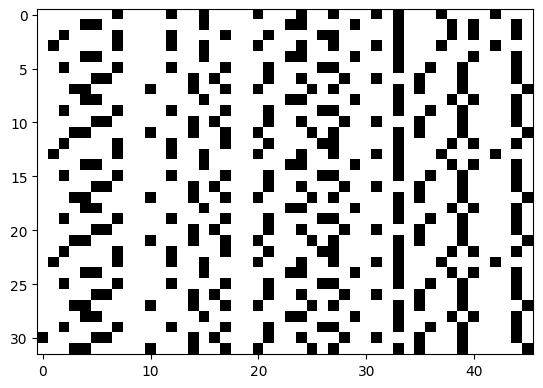

In [10]:
# Example matrix with True/False values
matrix = check_element_positions(grid, 0)

# Create a grid plot
plt.imshow(matrix, cmap='binary')
plt.show()
